In [2]:
import sys
sys.path.append('/workspaces/secure_inference/')

from typing import Dict, Union, Tuple
from abc import ABC, abstractmethod
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib widget
import torch
from torch import nn

from sklearn.metrics import pairwise_distances
from sklearn.cluster import AffinityPropagation
from sklearn.exceptions import ConvergenceWarning

from scipy.spatial.distance import hamming
from mmcls.models import build_classifier
from mmcls.datasets import build_dataset, build_dataloader
from mmcls.apis import single_gpu_test
from research.configs.classification.resnet.resnet18_cifar100 import baseline
from research.mmlab_extension.classification.resnet_cifar_v2 import ResNet_CIFAR_V2
from mmcv import Config
from mmcv.runner import load_checkpoint
from mmcls.utils import wrap_non_distributed_model


from research.distortion.parameters.classification.resent.resnet18_8xb16_cifar100 import Params as resnet18_8xb16_cifar100_Params

In [1]:
50000 / 32

1562.5

In [11]:
torch.Tensor([True, False]) + torch.Tensor([True, True])

tensor([2., 1.])

In [3]:
stats02 = pd.read_csv('/workspaces/secure_inference/tests/22_cluster_amount_stats/pref_0.2/per_channel.csv')

In [9]:
stats02.query('layer_name == "layer1_0_1"')['cluster_amount'].value_counts()

45.0      99
24.0      66
30.0      66
29.0      33
116.0     33
90.0      33
158.0     33
96.0      33
52.0      33
151.0     33
58.0      33
53.0      33
39.0      33
88.0      33
27.0      33
106.0     33
44.0      33
20.0      33
35.0      33
80.0      33
66.0      33
38.0      33
131.0     33
150.0     33
138.0     32
1024.0     1
Name: cluster_amount, dtype: int64

In [47]:
np.arange(0.2, 0.8, 0.1)
np.arange(0.25, 0.8, 0.1)

array([0.25, 0.35, 0.45, 0.55, 0.65, 0.75])

In [50]:
64 * 5

320

In [43]:
stats[['channel', 'cluster_amount']]

,channel,cluster_amount
0,0,NaN
1,1,114.0
2,2,NaN
3,3,NaN
4,4,204.0
...,...,...
128827,507,4.0
128828,508,4.0
128829,509,4.0
128830,510,4.0


In [ ]:
import pickle as pkl

In [7]:
with open('/workspaces/secure_inference/tests/distortion_extraction_22_11_small256/block_spec/0.08.pickle', 'rb') as f:
    res = pkl.load(f)

In [16]:
params = resnet18_8xb16_cifar100_Params()
dims = params.LAYER_NAME_TO_DIMS

In [39]:
for r in res['layer3_0_1']:
    print(r)


[0 1]
[1 2]
[1 3]
[1 3]
[3 1]
[0 1]
[1 3]
[2 1]
[1 3]
[1 4]
[1 2]
[2 1]
[1 2]
[1 2]
[1 2]
[2 1]
[1 2]
[1 3]
[1 3]
[1 2]
[1 2]
[2 1]
[2 1]
[2 2]
[1 3]
[0 1]
[1 3]
[1 4]
[1 2]
[1 2]
[1 3]
[2 1]
[1 3]
[1 2]
[1 3]
[1 3]
[0 1]
[1 2]
[1 2]
[1 2]
[1 3]
[1 2]
[2 2]
[1 3]
[1 3]
[2 1]
[2 1]
[2 1]
[2 2]
[1 3]
[1 2]
[0 1]
[1 2]
[1 3]
[2 1]
[1 2]
[2 1]
[0 1]
[2 1]
[2 1]
[2 2]
[1 3]
[3 1]
[1 2]
[3 1]
[2 1]
[2 1]
[2 1]
[0 1]
[2 2]
[1 2]
[1 3]
[1 2]
[2 1]
[2 1]
[2 1]
[1 3]
[1 3]
[1 2]
[1 2]
[0 1]
[2 1]
[8 1]
[2 1]
[3 1]
[1 3]
[0 1]
[0 1]
[2 1]
[1 3]
[0 1]
[1 2]
[1 3]
[0 1]
[1 3]
[3 1]
[3 1]
[3 1]
[1 2]
[0 1]
[3 1]
[2 8]
[0 1]
[2 1]
[4 1]
[2 1]
[1 3]
[2 1]
[1 3]
[2 1]
[4 1]
[3 1]
[1 3]
[2 1]
[2 1]
[3 1]
[0 1]
[1 2]
[1 2]
[1 2]
[4 1]
[1 2]
[3 1]
[0 1]
[0 1]
[1 3]
[2 1]
[2 2]
[2 1]
[2 1]
[0 1]
[1 3]
[2 2]
[3 1]
[3 1]
[2 1]
[1 2]
[1 3]
[1 3]
[2 1]
[1 2]
[3 1]
[4 1]
[1 3]
[2 2]
[4 1]
[2 2]
[2 2]
[1 3]
[0 1]
[2 1]
[1 2]
[2 1]
[1 3]
[2 1]
[1 2]
[2 2]
[3 1]
[1 3]
[1 3]
[2 1]
[2 1]
[1 3]
[4 1]
[1 3]
[0 1]
[1 3

In [25]:
for layer, layer_res in res.items():
    id = np.count_nonzero(np.all(layer_res == np.array([0, 1]), axis=1))
    id_ratio = id / layer_res.shape[0]
    print(f'{layer}: id {id}, ratio {id_ratio}')

stem: id 54, ratio 0.84375
layer1_0_1: id 39, ratio 0.609375
layer1_0_2: id 54, ratio 0.84375
layer1_1_1: id 41, ratio 0.640625
layer1_1_2: id 61, ratio 0.953125
layer2_0_1: id 10, ratio 0.078125
layer2_0_2: id 67, ratio 0.5234375
layer2_1_1: id 61, ratio 0.4765625
layer2_1_2: id 44, ratio 0.34375
layer3_0_1: id 36, ratio 0.140625
layer3_0_2: id 8, ratio 0.03125
layer3_1_1: id 191, ratio 0.74609375
layer3_1_2: id 8, ratio 0.03125
layer4_0_1: id 69, ratio 0.134765625
layer4_0_2: id 1, ratio 0.001953125
layer4_1_1: id 110, ratio 0.21484375
layer4_1_2: id 22, ratio 0.04296875


In [37]:
from functools import reduce 
from operator import mul, add
sizes = {layer_name: reduce(mul, cur_dims) for layer_name, cur_dims in dims.items()}
ratios = {layer_name: np.count_nonzero(np.all(layer_res == np.array([0, 1]), axis=1)) for 
          layer_name, layer_res in res.items()}
full_size = sum(list(sizes.values()))
id_size = sum([ratios[name] * dims[name][1] * dims[name][2] for name in ratios])
print(full_size)
print(id_size)
print(1-id_size/full_size)

557056
320352
0.42491957720588236


In [1]:
import pandas as pd
import torch

In [3]:
a = torch.Tensor([1, 2])
a.min().item()

1.0

In [7]:
a = torch.Tensor([1]).float()
b = a.long()

In [8]:
b[0] = 2
print(b)
print(a)

tensor([2])
tensor([1.])


In [14]:
torch.unique(torch.Tensor([1, 1, 2])).unsqueeze(dim=0)

tensor([[1., 2.]])

In [6]:
channels_2_11 = pd.read_csv('/workspaces/secure_inference/tests/2_11_single_layer_logger_debug/per_channel.csv')

In [28]:
channels_2_11.query('batch_index == 312')['all_zero'].value_counts()

True     35
False    29
Name: all_zero, dtype: int64

In [9]:
channels_2_11['cluster_amount2'] = channels_2_11['cluster_amount']
channels = [47, 24, 9, 12, 29]
channels_2_11.loc[channels_2_11['channel'].isin(channels), 'cluster_amount2'] = 32**2
channels_2_11.query('batch_index == 312 & (~all_zero)')['cluster_amount2'].mean() / (32**2) * (29/64)

0.12286376953124999

In [22]:
channels_2_11['affinity_ratio'] = channels_2_11['same_label_affinity'] / channels_2_11['diff_label_affinity']
channels_2_11 = channels_2_11.query('~all_zero')
gb = channels_2_11.groupby('channel').agg(
    {'affinity_ratio': ['max', 'min'],
     'drelu_mean': ['max', 'min'],
     'cluster_amount': ['max', 'min']}).reset_index()
gb.sort_values(by=('affinity_ratio', 'max'), ascending=False)

channel affinity_ratio           drelu_mean           cluster_amount       
                      max       min        max       min            max    min
22      47       0.852036  0.810796   0.809064  0.803483          102.0   89.0
11      24       0.801058  0.772192   0.838469  0.830580          116.0   86.0
1        9       0.663375  0.523613   0.900366  0.890930           74.0   63.0
2       12       0.641153  0.553111   0.739785  0.733954          177.0  176.0
15      29       0.598127  0.553669   0.876037  0.871004          131.0  116.0
19      41       0.576228  0.457302   0.162761  0.154995          159.0  123.0
26      56       0.568045  0.500701   0.915605  0.906774           73.0   60.0
23      48       0.482391  0.440581   0.795022  0.790813          164.0  155.0
7       19       0.446740  0.361728   0.173471  0.165609          149.0  137.0
5       15       0.446095  0.422109   0.839582  0.838244          155.0  138.0
6       16       0.443434  0.389301   0.167771  0.162201           74.0   49.0
25      53       0.424980  0.412081   0.729801  0.721815          173.0  167.0
13      27       0.395471  0.370888   0.789317  0.784152          172.0  162.0
10      22       0.389254  0.325440   0.833187  0.829181          174.0  145.0
21      45       0.378669  0.336411   0.233179  0.228460          196.0  182.0
3       13       0.357253  0.341262   0.511987  0.504683          146.0  136.0
16      34       0.327838  0.310633   0.328606  0.318015          151.0  141.0
24      52       0.324403  0.233596   0.134735  0.129960          128.0  114.0
27      58       0.323250  0.297891   0.758734  0.751711          176.0  165.0
20      43       0.285058  0.268448   0.234893  0.227034          101.0   94.0
8       20       0.282781  0.267069   0.266241  0.257730          121.0  106.0
0        0       0.276479  0.224003   0.187563  0.182076           77.0   62.0
12      25       0.258546  0.240895   0.221620  0.213563           81.0   71.0
14      28       0.255398  0.217033   0.091273  0.087966          158.0  137.0
28      63       0.250531  0.186530   0.058083  0.052494          126.0  113.0
17      38       0.220316  0.180170   0.106040  0.088821          138.0  129.0
4       14       0.196891  0.180484   0.206267  0.198672           65.0   58.0
9       21       0.190054  0.167375   0.181826  0.178043           59.0   50.0
18      40       0.175717  0.160173   0.197247  0.191138           59.0   54.0

In [20]:
gb.columns

MultiIndex([(       'channel',    ''),
            ('affinity_ratio', 'max'),
            ('affinity_ratio', 'min'),
            (    'drelu_mean', 'max'),
            (    'drelu_mean', 'min')],
           )

In [9]:
import pandas as pd
a = pd.read_csv('/workspaces/secure_inference/tests/13_10_single_layer_logger2/crelu_res/layer1_0_1/general.csv')
b = pd.read_csv('/workspaces/secure_inference/tests/13_10_single_layer_logger2/crelu_res/layer1_0_1/per_channel.csv')


In [17]:
# b['Same_Label_Affinity'].argmin()
b.loc[495]

Batch_Index                   172
Layer_Name             layer1_0_1
Channel_Index                  47
Is_Active                    True
Failed_Convergence          False
Cluster_Amount               96.0
Same_Label_Affinity     -0.265284
Diff_Label_Affinity      -0.32382
Name: 495, dtype: object

In [ ]:
b['label_ratio'] = b['Same_Label_Affinity'] / b['Diff_Label_Affinity']
C = b[~pd.isna(b['label_ratio'])]
C.groupby('Channel_Index')['label_ratio'].agg(['min', 'max']).sort_values('min')

,min,max
Channel_Index,,
40,0.161187,0.169846
21,0.169206,0.190044
38,0.179236,0.214943
14,0.181384,0.188687
63,0.189789,0.226980
28,0.217360,0.255374
0,0.221536,0.274473
52,0.234543,0.324271
25,0.240915,0.249526


In [12]:
b.query('Channel_Index == 0')

,Batch_Index,Layer_Name,Channel_Index,Is_Active,Failed_Convergence,Cluster_Amount,Same_Label_Affinity,Diff_Label_Affinity
0,32,layer1_0_1,0,True,False,69.0,-0.069269,-0.279295
64,52,layer1_0_1,0,True,False,77.0,-0.066132,-0.274836
128,72,layer1_0_1,0,True,True,71.0,NaN,NaN
192,92,layer1_0_1,0,True,False,67.0,-0.068323,-0.278008
256,112,layer1_0_1,0,True,False,71.0,-0.069480,-0.278649
320,132,layer1_0_1,0,True,False,63.0,-0.073245,-0.281429
384,152,layer1_0_1,0,True,False,74.0,-0.061060,-0.275621
448,172,layer1_0_1,0,True,False,62.0,-0.076877,-0.280090
512,192,layer1_0_1,0,True,False,70.0,-0.067146,-0.278236


In [14]:
import cv2
import os
import numpy as np

def images_to_video_with_fade(folder_path, output_path, frame_rate=30, fade_duration=10):
    # Get the list of image filenames sorted by name
    images = sorted([img for img in os.listdir(folder_path) if img.endswith('.png')])
    
    # Read the first image to get video dimensions
    frame = cv2.imread(os.path.join(folder_path, images[0]))
    height, width, _ = frame.shape

    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    video = cv2.VideoWriter(output_path, fourcc, frame_rate, (width, height))
    
    # Write each image to the video with fade-in and fade-out effects
    for i, image in enumerate(images):
        frame = cv2.imread(os.path.join(folder_path, image))
        
        # Fade-in effect for the first few frames
        if i < fade_duration:
            alpha = i / fade_duration
            fade_frame = cv2.addWeighted(frame, alpha, np.zeros_like(frame), 1 - alpha, 0)
            video.write(fade_frame)
        
        # Normal frame
        video.write(frame)
        
        # Fade-out effect for the last few frames
        if len(images) - i <= fade_duration:
            alpha = (len(images) - i) / fade_duration
            fade_frame = cv2.addWeighted(frame, alpha, np.zeros_like(frame), 1 - alpha, 0)
            video.write(fade_frame)
    
    # Release the video writer
    video.release()

# Example usage
images_to_video_with_fade('/workspaces/secure_inference/tests/25_9_single_channel_train_pref/crelu_res/clusters', 
                          '/workspaces/secure_inference/tests/25_9_single_channel_train_pref/crelu_res/clusters_vid.mp4',
                          frame_rate=2)

In [7]:
params = resnet18_8xb16_cifar100_Params()
params.LAYER_NAME_TO_DIMS
from functools import reduce
import operator

dims = [reduce(operator.mul, l) for l in params.LAYER_NAME_TO_DIMS.values()]
res = sum(dims)
dims

[65536,
 65536,
 65536,
 65536,
 65536,
 32768,
 32768,
 32768,
 32768,
 16384,
 16384,
 16384,
 16384,
 8192,
 8192,
 8192,
 8192]

In [13]:
1 == 'hi'

False

In [3]:
class ClusterConvergenceException(Exception):
    def __init__(self, message='convergence exception') -> None:
        super().__init__(message)

def _get_layer_details(model, layer_name) -> Tuple[nn.Module, str]:
    if layer_name == "stem":
        block = model.backbone
        name = 'relu'
    else:
        res_layer_name, block_name, relu_name = layer_name.split("_")
        layer = getattr(model.backbone, res_layer_name)
        block = layer._modules[block_name]
        name = f"relu_{relu_name}"
    return block, name

def set_layer(model, layer_name, block_relu: nn.Module):
    block, name = _get_layer_details(model, layer_name)
    setattr(block, name, block_relu)

def get_layer(model, layer_name):
    block, name = _get_layer_details(model, layer_name)
    return getattr(block, name)


def _format_cluster_samples(drelu_maps):
    if isinstance(drelu_maps, torch.Tensor):
        drelu_maps = drelu_maps.numpy()
    if drelu_maps.ndim == 5:
        drelu_maps = drelu_maps.reshape(-1, *drelu_maps.shape[2:])
    assert isinstance(drelu_maps, np.ndarray) and drelu_maps.ndim == 4, 'incorrect input format'
    samples = drelu_maps.reshape(drelu_maps.shape[0], -1).T  # TODO: change when moving to multi channels
    return samples


def cluster_neurons(drelu_maps, no_converge_fail=True, precompute_affinity=True,
                    preference_quantile=None):
    assert not (not precompute_affinity and preference_quantile is not None), \
        'to get the prefrence you need to precomutpe the affinity matrix'
    samples = _format_cluster_samples(drelu_maps)
    preference = None
    if precompute_affinity:
        affinity_mat = -pairwise_distances(samples, metric='hamming')
        algo_input = affinity_mat
        input_type = 'precomputed'
        if preference_quantile is not None:
            preference = np.quantile(affinity_mat, preference_quantile)
    else:
        algo_input = samples
        input_type = 'euclidean'
    with warnings.catch_warnings(record=True) as caught_warnings:
        cluster_res = AffinityPropagation(random_state=42, affinity=input_type,
                                          preference=preference).fit(algo_input)
        for warning in caught_warnings:
            if warning.category == ConvergenceWarning and no_converge_fail:
                raise ClusterConvergenceException(warning.message)
    return cluster_res


def plot_clustering(cluster_res, H, W):
    cluster_centers_indices = cluster_res.cluster_centers_indices_
    labels = cluster_res.labels_

    n_clusters_ = len(cluster_centers_indices)
    
    X = np.meshgrid(np.arange(H), np.arange(W))
    X = np.stack([X[0].ravel(), X[1].ravel()], axis=1)

    plt.close("all")
    plt.figure(1)
    plt.clf()

    colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, n_clusters_)))

    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X[cluster_centers_indices[k]]
        plt.scatter(
            X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
        )
        plt.scatter(
            cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
        )
        for x in X[class_members]:
            plt.plot(
                [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
            )

    plt.title("Estimated number of clusters: %d" % n_clusters_)
    plt.show()

In [4]:
class ClusterRelu(nn.Module):
    def __init__(self, C, H, W, prototype=None, inter: Union[float, int, np.ndarray, torch.Tensor]=0):
        super(ClusterRelu, self).__init__()
        self.C, self.H, self.W = C, H, W
        self._prototype = self._inter = None
        self.prototype = prototype
        self.inter = inter

        self.channel_indices = nn.Parameter(torch.arange(C).view(C, 1, 1).repeat(1, H, W),
                                            requires_grad=False) # technical, used for selecting the prototypes
        
    def forward(self, x):
        # Extract row and col indices from prototype
        rows, cols = self.prototype[0], self.prototype[1]

        # Gather prototype values using ellipsis indexing
        prototype_x = x[:, self.channel_indices, rows, cols]

        # Calculate ReLU map and apply it
        relu_map = (x * (1 - self.inter) + prototype_x * self.inter).gt_(0)
        output = x * relu_map

        return output
        
    @property
    def prototype(self) -> torch.Tensor:
        return self._prototype
    
    @prototype.setter
    def prototype(self, new_prototype):
        if new_prototype is not None:
            if isinstance(new_prototype, np.ndarray):
                new_prototype = torch.from_numpy(new_prototype)
            else:
                new_prototype = new_prototype.clone() 
        else:
            new_prototype = _create_default_prototype(C=self.C, H=self.H, W=self.W)
        if self._prototype is None:
            self._prototype = nn.Parameter(new_prototype, requires_grad=False)
        else:
            self._prototype.copy_(new_prototype)

    @property
    def inter(self) -> torch.Tensor:
        return self._inter
    
    @inter.setter
    def inter(self, new_inter):
        if new_inter is None:
            self._inter = new_inter
        else:
            if isinstance(new_inter, np.ndarray):
                new_inter = torch.from_numpy(new_inter)
            elif isinstance(new_inter, torch.Tensor):
                new_inter = new_inter.clone()
            else:
                new_inter = torch.full((self.C, self.H, self.W), new_inter, dtype=torch.float)
            assert torch.all(torch.logical_and(new_inter >= 0, new_inter <= 1)) # TODO: remove at real time
            if self._inter is None:
                self._inter = nn.Parameter(new_inter, requires_grad=False)
            else:
                self._inter.copy_(new_inter)
    
def _create_default_prototype(C, H, W):
    prototype = torch.meshgrid(torch.arange(H), torch.arange(W), indexing='ij')
    prototype = torch.stack(prototype, dim=0).unsqueeze(1).repeat(1, C, 1, 1)
    return prototype
    
def prototype_from_clusters(C, H, W, channel_clusters={}) -> ClusterRelu:
    prototype = _create_default_prototype(C=C, H=H, W=W)
    for channel, cluster_res in channel_clusters.items():
        cluster_centers_indices = cluster_res.cluster_centers_indices_
        labels = cluster_res.labels_.reshape(H, W)
        for label, cluster_idx in enumerate(cluster_centers_indices):
            label_rows, label_cols = np.nonzero(labels == label)
            center_row = cluster_idx // W 
            center_col = cluster_idx % W
            prototype[0, channel, label_rows, label_cols] = center_row
            prototype[1, channel, label_rows, label_cols] = center_col
    return prototype

In [5]:
class CreluManager:
    def __init__(self, model, layer_name, channel_idx, 
                 update_config: dict, C, H, W,
                 plot=False):
        self.model = model
        self.layer_name = layer_name
        self.channel_idx = channel_idx
        self.update_config = update_config
        self.C, self.H, self.W = C, H, W
        self.plot = plot

        self.prefrence_quantile = self.update_config['cluster']['preference_quantile_start']

        self.batch_idx = 0
        self.drelu_maps = self.cur_cluster_res = None
        self.batch_cluster_update_fail = {}
        
        self._init_crelu()
        self.cluster_started = False

    def hook_fn(self, module, input, output):
        if self._should_update(self.update_config['drelu_stats']):
            self._update_drelu_maps(output)
        
        if self._should_update(self.update_config['cluster']):
            self._update_clusters()
            if self.plot:
                plot_clustering(self.cur_cluster_res, H=self.H, W=self.W)
            
        cluster_blocking_inter = self.update_config['inter']['await_cluster_start'] \
            and not self.cluster_started
        if self._should_update(self.update_config['inter']) and \
            not cluster_blocking_inter:
            self._update_inter()
    
        self.batch_idx += 1

    def _should_update(self, config):
        update_freq = config['update_freq']
        if update_freq is None:
            return False
        elif self.batch_idx == 0:
            return config['update_on_start']
        return self.batch_idx % config['update_freq'] == 0


    def _update_drelu_maps(self, output):
        channel_output = output[:, self.channel_idx:self.channel_idx+1, :, :]
        cur_drelu_map = (channel_output != 0).cpu()
        if self.drelu_maps is None:
            self.drelu_maps = cur_drelu_map
        else:
            self.drelu_maps = torch.concat([self.drelu_maps, cur_drelu_map], dim=0)
    
    def _update_clusters(self, reset_drelu_maps=True):
        if not self.cluster_started:
            self.cluster_started = True
        try:
            self.cur_cluster_res = cluster_neurons(self.drelu_maps, 
                                                   preference_quantile=self.prefrence_quantile)
            prototype = prototype_from_clusters(self.C, self.H, self.W, {self.channel_idx: self.cur_cluster_res})
            crelu = get_layer(self.model, self.layer_name)
            crelu.prototype = prototype
        except ClusterConvergenceException as e:
            print(f"Caught convergence warning: {e}, \n"\
                      "not updating clusters")
            self.batch_cluster_update_fail[self.batch_idx] = e

        if reset_drelu_maps:
            self.drelu_maps = None
        if self.prefrence_quantile is not None:
            preference_decay = self.update_config['cluster']['preference_quantile_decay']
            self.prefrence_quantile *= preference_decay
        

    def _update_inter(self):
        crelu = get_layer(self.model, self.layer_name)
        new_inter = crelu.inter + self.update_config['inter']['update_step']
        new_inter = torch.clamp(new_inter, 0, 1)
        crelu.inter = new_inter

    def _init_crelu(self):
        inter = self.update_config['inter'].get('default_start', 0)
        crelu = ClusterRelu(C=self.C, H=self.H, W=self.W, inter=inter)
        set_layer(self.model, self.layer_name, crelu)


def add_drelu_hooks(model, layer_names, channel_idx,
                    update_config, **kwargs) -> Dict[str, CreluManager]:
    hooks = {}
    for layer_name in layer_names:
        C, H, W = resnet18_8xb16_cifar100_Params().LAYER_NAME_TO_DIMS[layer_name]
        # layer = dict(model.named_modules())[layer_name]
        hook_instance = CreluManager(model, layer_name, channel_idx, update_config,
                                     C=C, H=H, W=W, **kwargs)
        layer = get_layer(model, layer_name)
        layer.register_forward_hook(hook_instance.hook_fn)
        hooks[layer_name] = hook_instance
    return hooks

In [8]:
config_path = '/workspaces/secure_inference/research/configs/classification/resnet/resnet18_cifar100/baseline.py'
cfg = Config.fromfile(config_path)

dataset = build_dataset(cfg.data.test)
loader_cfg = dict(
        # cfg.gpus will be ignored if distributed
        num_gpus=1,
        dist=False,
        round_up=True,
        shuffle=False,  # Not shuffle by default
        sampler_cfg= None,  # Not use sampler by default
        **cfg.data.get('test_dataloader', {})
    )
loader_cfg.update({
        k: v
        for k, v in cfg.data.items() if k not in [
            'train', 'val', 'test', 'train_dataloader', 'val_dataloader',
            'test_dataloader'
        ]
    })
if 'distortion_extraction' in loader_cfg:
    del loader_cfg['distortion_extraction']
loader_cfg['samples_per_gpu'] = 256
data_loader = build_dataloader(dataset, **loader_cfg)

In [7]:
for i, data in enumerate(data_loader):
    a=1
    print(i)
    if i >= 4:
        break

from mmcls.apis import multi_gpu_test, single_gpu_test

0
1
2
3
4


load checkpoint from local path: /workspaces/secure_inference/tests/resnet18_10_8/latest.pth
Processing batch 0


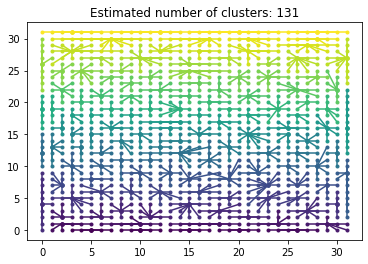

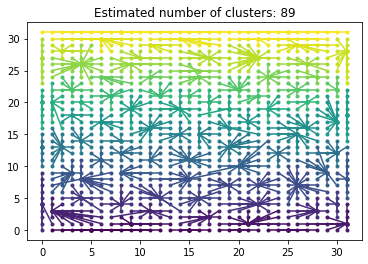

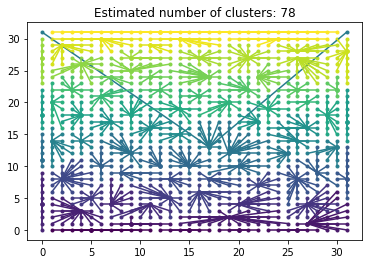

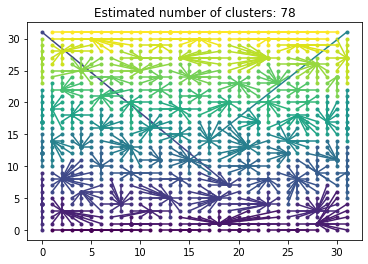

Processing batch 4
Caught convergence warning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels., 
not updating clusters


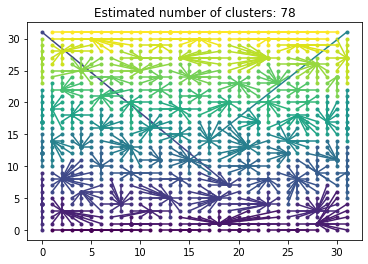

In [73]:
model = build_classifier(cfg.model)
ckpt = '/workspaces/secure_inference/tests/resnet18_10_8/latest.pth'
checkpoint = load_checkpoint(model, ckpt, map_location='cpu')

batch_amount = 5
plot = True
update_on_start = True
cluster_update_freq = 1

conf = {
    'cluster': {'update_freq': cluster_update_freq, 
                'update_on_start': update_on_start,
                'preference_quantile_start': 0.5,
                'preference_quantile_decay': 0.01},
    'inter': {'update_freq': 1, 
              'update_on_start': update_on_start,
              'update_step': 1 / batch_amount,
            #   'update_step': 1,
              'await_cluster_start': True},
    'drelu_stats': {'update_freq': cluster_update_freq,
                    'update_on_start': update_on_start}
}


layers_for_hook = [
    'layer1_0_1',
    # 'backbone.layer1.0.relu_2',
    # 'backbone.layer1.1.relu_1',
    # 'backbone.layer1.1.relu_2'
]

hooks = add_drelu_hooks(model, layers_for_hook, channel_idx=0,
                        update_config=conf, plot=plot)

for i, data in enumerate(data_loader):
    if i % cluster_update_freq == 0:
        print(f"Processing batch {i}")
    out = model.forward_train(data['img'], )
    if i+1 >= batch_amount:  # Stop after N examples
        break

{8: __main__.ClusterConvergenceException(sklearn.exceptions.ConvergenceWarning('Affinity propagation did not converge, this model may return degenerate cluster centers and labels.')),
 12: __main__.ClusterConvergenceException(sklearn.exceptions.ConvergenceWarning('Affinity propagation did not converge, this model may return degenerate cluster centers and labels.')),
 16: __main__.ClusterConvergenceException(sklearn.exceptions.ConvergenceWarning('Affinity propagation did not converge, this model may return degenerate cluster centers and labels.'))}

/opt/conda/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


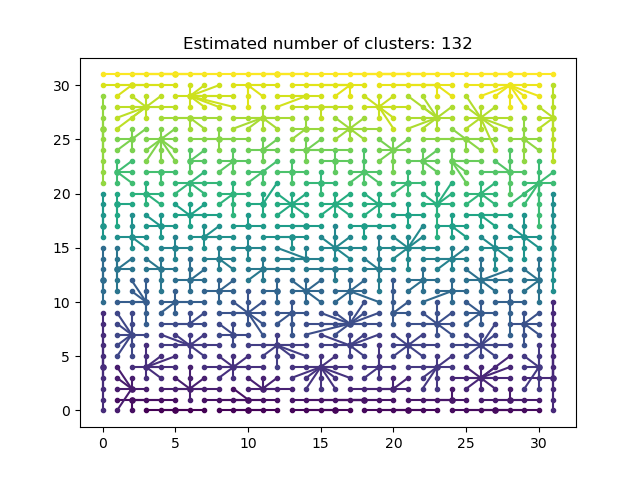

In [7]:
layer_name = 'backbone.layer1.0.relu_1'
layer_drelu = hooks[layer_name].drelu_maps
cluster_res = cluster_neurons(layer_drelu)
crelu = prototype_from_clusters(64, 32, 32, {0: cluster_res}, inter=0.5)
plot_clustering(layer_drelu, cluster_res)

In [63]:
set_layer(model, 'layer1_0_1', crelu)

In [48]:
m = model.to('cuda')

In [55]:
m.backbone.layer1[0].conv1.weight.device

device(type='cuda', index=0)

In [64]:
for i, data in enumerate(data_loader):
    print(f"Processing batch {i+1}")
    out = model.forward_test(data['img'])
    if i+1 >= 2:  # Stop after N examples
        break

Processing batch 1
Processing batch 2


In [41]:
model.module.named_modules

<bound method Module.named_modules of ImageClassifier(
  (backbone): ResNet_CIFAR_V2(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (layer1): ResLayer(
      (0): BasicBlockV2(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (drop_path): Identity()
        (relu_1): ClusterRelu()
        (relu_2): ReLU(inplace=True)
      )
      (1): BasicBlockV2(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (

In [66]:
# model = build_classifier(cfg.model)
# ckpt = '/workspaces/secure_inference/tests/resnet18_10_8/latest.pth'
# checkpoint = load_checkpoint(model, ckpt, map_location='cpu')
model = wrap_non_distributed_model(model, device='cuda')
# model = model.to('cuda')
outputs = single_gpu_test(model, data_loader)
eval_results = dataset.evaluate(
                results=outputs)

[                                                  ] 0/10000, elapsed: 0s, ETA:

[>>>>>>>>>>>>>>>>>>>>>>>>] 10000/10000, 2211.4 task/s, elapsed: 5s, ETA:     0s

In [67]:
eval_results

{'accuracy_top-1': 73.97000122070312, 'accuracy_top-5': 92.11000061035156}